# Random Forest ( Fraud DataSet ) 

### Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## 1.  <u>Data Description :

**Undergrad :** person is under graduated or not.
    
**Marital.Status :** marital status of a person.
    
**Taxable.Income :** Taxable income is the amount of how much tax an individual owes to the government.
    
**Work Experience :** Work experience of an individual person.
    
**Urban :** Whether that person belongs to urban area or not.
 

# 2. <u> Import Neccesery Libraries -  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# 2. <u>Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [3]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# 4. <u> EDA -  

In [4]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.duplicated().sum()

0

In [6]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# 5. <u> Data Visualization -  

In [8]:
corr=fraud_data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


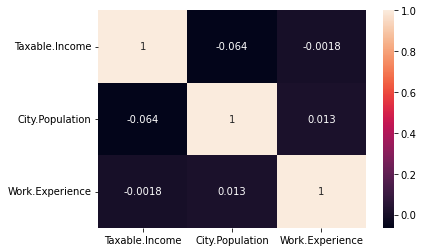

In [9]:
sns.heatmap(corr,annot=True)
plt.show()

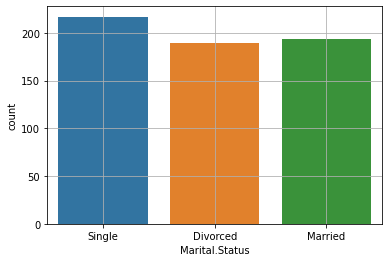

In [10]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

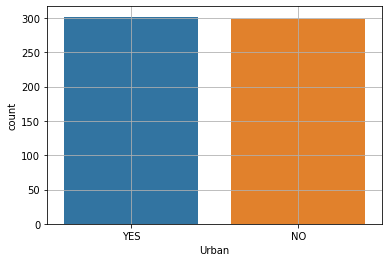

In [11]:
sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

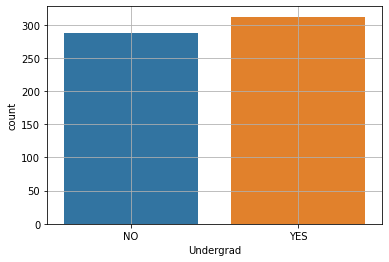

In [12]:
sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

# 6. <u> Data Preparation -  

In [13]:
fraud_data['Taxable.Income'] = fraud_data['Taxable.Income'].apply(lambda x:'Risky' if x<=30000 else 'Good')

In [14]:
fraud_data.rename({'Taxable.Income' : 'Taxable_Income'}, axis = 1, inplace = True)

In [15]:
fraud_data

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [16]:
fraud_data['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

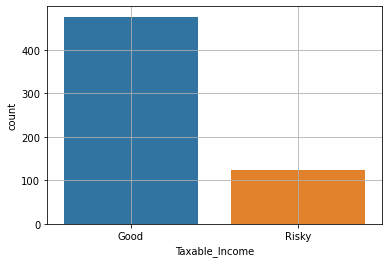

In [17]:
sns.countplot(fraud_data['Taxable_Income'])
plt.grid(True)
plt.show()

## Label Encoding 

In [18]:
#encoding categorical fraud_data
label_encoder = LabelEncoder()

In [19]:
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


# 7. <u> Model Building -  

In [20]:
x=fraud_data.drop('Taxable_Income',axis=1)
y=fraud_data[['Taxable_Income']]

# 8. <u> Model Training -  

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [22]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [23]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

# 8. <u> Model Testing  -  

In [26]:
y_pred_train = rf_model.predict(x_train)

# 9. <u> Model Evaluation -  

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is',accuracy_score(y_train,y_pred_train))
print('confusion matrix is \n',confusion_matrix(y_train,y_pred_train))
print('classification report is \n',classification_report(y_train,y_pred_train))

Accuracy score is 1.0
confusion matrix is 
 [[381   0]
 [  0  99]]
classification report is 
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       381
       Risky       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### Test Data

In [28]:
y_test_pred = rf_model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is',accuracy_score(y_test,y_test_pred))
print('confusion matrix is \n',confusion_matrix(y_test,y_test_pred))
print('classification report is \n',classification_report(y_test,y_test_pred))

Accuracy score is 0.7416666666666667
confusion matrix is 
 [[88  7]
 [24  1]]
classification report is 
               precision    recall  f1-score   support

        Good       0.79      0.93      0.85        95
       Risky       0.12      0.04      0.06        25

    accuracy                           0.74       120
   macro avg       0.46      0.48      0.46       120
weighted avg       0.65      0.74      0.69       120



In [30]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.79375


In [34]:
rf_model_cv=RandomForestClassifier(criterion='entropy',max_depth=2,min_samples_leaf=1,min_samples_split=2)
rf_model_cv.fit(x_train,y_train)
y_pred=rf_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7916666666666666


In [35]:
fraud_data['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

# Observation
## There is an imbalance in dataset,to overcome oversampling is done using SMOTE technique

In [38]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 0)
x_smt,y_smt = smt.fit_resample(x,y)

In [39]:
x_smt.shape,y_smt.shape

((952, 5), (952, 1))

In [40]:
x_train_smt,x_test_smt,y_train_smt,y_test_smt = train_test_split(x_smt,y_smt,test_size=0.20,random_state=12)

In [41]:
rf_model_smt = RandomForestClassifier()
rf_model_smt.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred_smt = rf_model_smt.predict(x_test_smt)

In [43]:
print('Accuracy score is',accuracy_score(y_test_smt,y_pred_smt))
print('confusion matrix is \n',confusion_matrix(y_test_smt,y_pred_smt))
print('classification report is \n',classification_report(y_test_smt,y_pred_smt))

Accuracy score is 0.680628272251309
confusion matrix is 
 [[89  3]
 [58 41]]
classification report is 
               precision    recall  f1-score   support

        Good       0.61      0.97      0.74        92
       Risky       0.93      0.41      0.57        99

    accuracy                           0.68       191
   macro avg       0.77      0.69      0.66       191
weighted avg       0.77      0.68      0.66       191



# ========================== END ============================= 